**Глава 1. Основы обработки изображений**

Навигация к соседним тетрадям:
<!--NAVIGATION-->
<[Глава 10. openCV](10_openCV.ipynb) | [Содержание](0_index.ipynb) | [Глава 2. Преобразования изображений](2_local_image_descriptors.ipynb)>

<a href="https://colab.research.google.com/github/mualal/computer-vision-with-python/blob/master/1_basic_image_handling_and_processing.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>

In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
try:
    import google.colab, sys
    !git clone https://github.com/mualal/computer-vision-with-python.git
    sys.path.append('computer-vision-with-python')
    %cd computer-vision-with-python
except:
    import sys
    sys.path.append('..')

In [3]:
import imtools
import pca
import rof

In [4]:
pil_im = Image.open(os.path.join('images_input', 'Peterhof.jpg'))

In [5]:
pil_im.size

(4032, 3024)

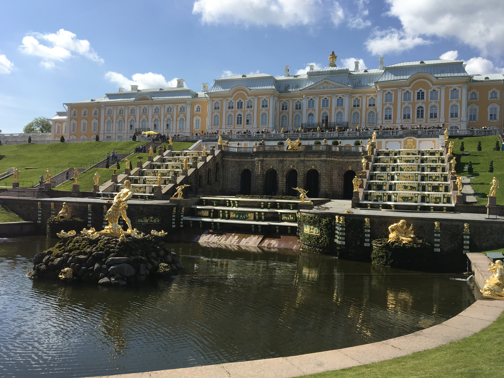

In [6]:
pil_im = pil_im.resize((504, 378))
pil_im

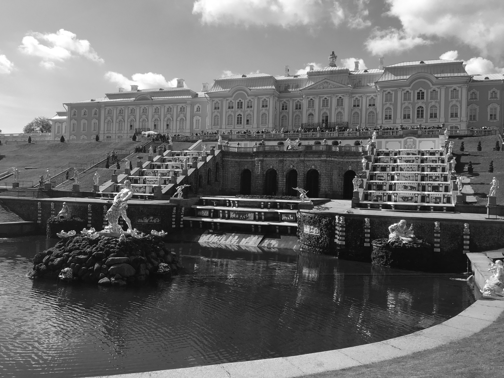

In [7]:
pil_im_gray = Image.open(os.path.join('images_input', 'Peterhof.jpg')).resize((504, 378)).convert('L')
pil_im_gray

In [8]:
input_dir = 'images_input'
files_name_list = ['Peterhof.jpg']
output_dir = 'images_output'

for file_name in files_name_list:
    input_file = os.path.join(input_dir, file_name)
    output_file = os.path.join(output_dir, file_name.split('.')[0] + '.png')
    try:
        Image.open(input_file).save(output_file)
    except IOError:
        print('Ошибка во время преобразования')


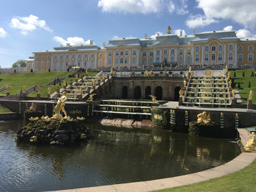

In [9]:
pil_im_thumbnail = pil_im.copy()
pil_im_thumbnail.thumbnail((256, 256))
pil_im_thumbnail

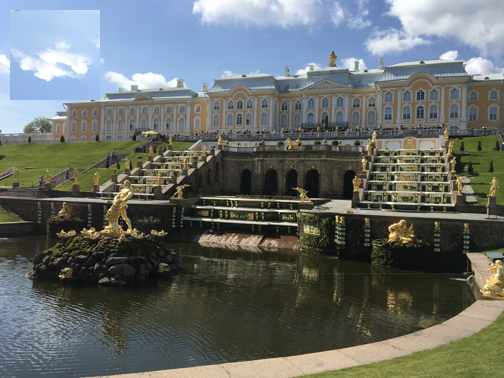

In [10]:
box = (10, 10, 100, 100)
region = pil_im.crop(box)
region = region.transpose(Image.Transpose.ROTATE_180)
pil_im.paste(region, box)
pil_im

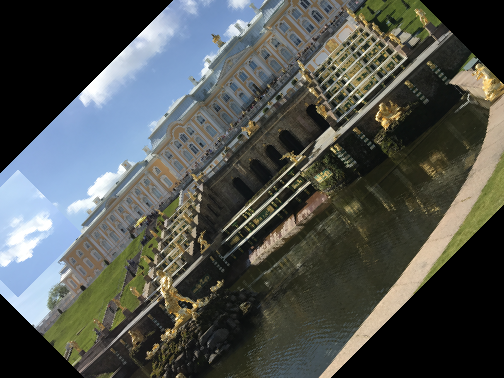

In [11]:
out = pil_im.rotate(45)
out

Text(0.5, 1.0, 'Петергоф')

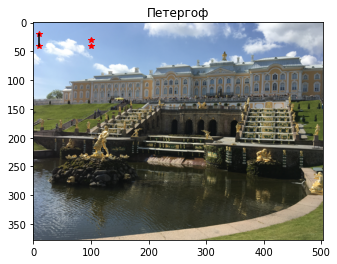

In [12]:
im = np.array(
    Image.open(
        os.path.join('images_input', 'Peterhof.jpg')
    ).resize((504, 378))
)
plt.imshow(im)
x = [10, 10, 100, 100]
y = [20, 40, 30, 40]
plt.plot(x, y, 'r*')
plt.plot(x[:2], y[:2],'black')
plt.title('Петергоф')

(0.0, 503.0, 0.0, 377.0)

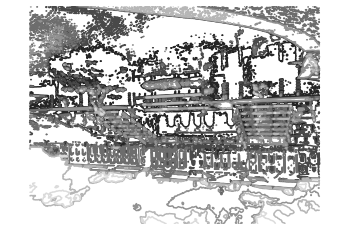

In [13]:
im = np.array(
    Image.open(
        os.path.join(
            'images_input',
            'Peterhof.jpg'
        )
    ).resize((504, 378)).convert('L')
)
plt.figure()
plt.gray()
plt.contour(im)
plt.axis('equal')
plt.axis('off')

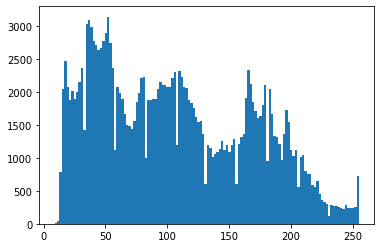

In [14]:
plt.figure()
plt.hist(im.flatten(), 128)
plt.show()

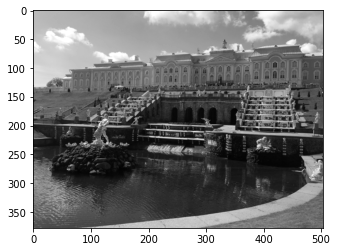

In [15]:
plt.imshow(im)


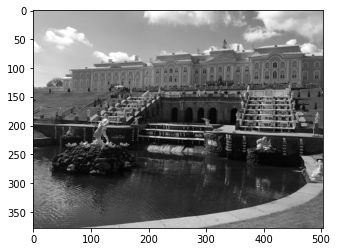

In [16]:
im2 = 255 - im
im3 = (10/255) * im + 10
im4 = 255 * (im / 255)**2
plt.imshow(im3)

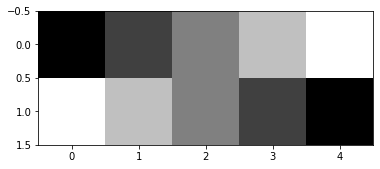

In [17]:
plt.imshow(Image.fromarray(np.uint8(Image.fromarray(np.uint8([[1,2,3,4,5],[5,4,3,2,1]])))))

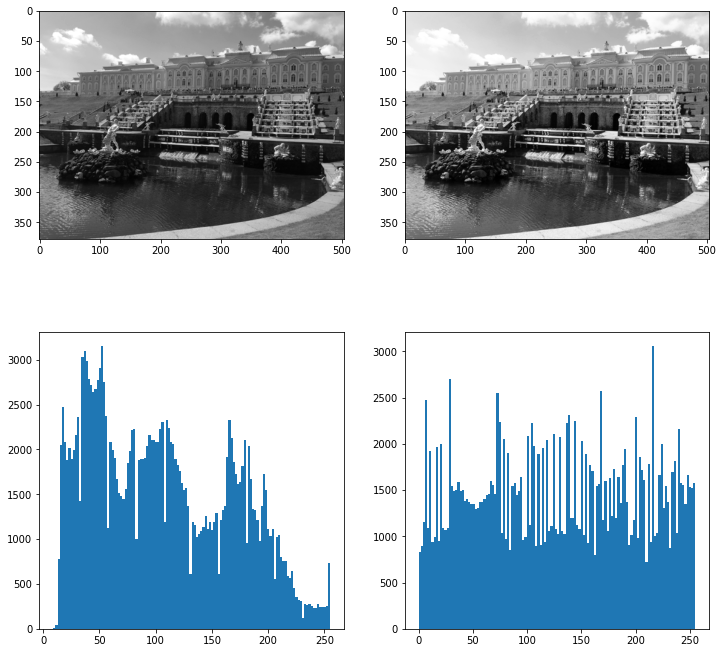

In [18]:
im = np.array(Image.open(os.path.join('images_input', 'Peterhof.jpg')).resize((504, 378)).convert('L'))
im2, cdf = imtools.hist_equalization(im)
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
ax0.imshow(im)
ax1.imshow(im2)
ax2.hist(im.flatten(), 128)
ax3.hist(im2.flatten(), 128)
plt.show()

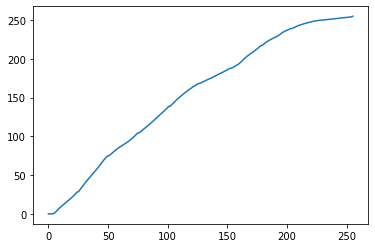

In [19]:
plt.plot(cdf)

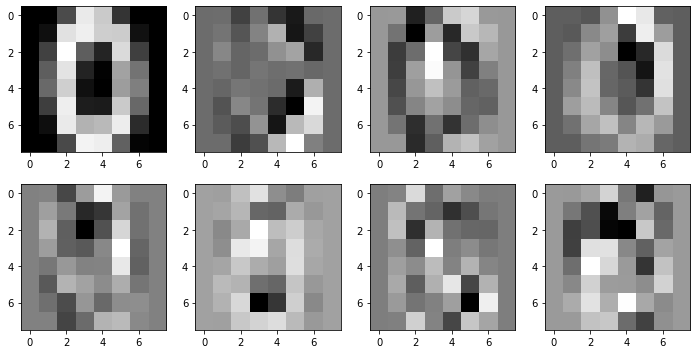

In [20]:
zeroes = load_digits(n_class=1)
immatrix = np.array([zero.flatten() for zero in zeroes.images], 'f')

V, S, immean = pca.pca(immatrix)
axs = [0] * 8
fig, ((axs[0], axs[1], axs[2], axs[3]), (axs[4], axs[5], axs[6], axs[7])) = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs[0].imshow(immean.reshape(zeroes.images[0].shape[0], zeroes.images[0].shape[1]))
for i in range(1,8):
    axs[i].imshow(V[i].reshape(zeroes.images[0].shape[0], zeroes.images[0].shape[1]))


In [21]:
imtools.image_averaging(imtools.get_imlist('images_input'))

images_input\sunset_tree.jpg failed to open
images_input\turningtorso1.jpg failed to open


array([[[ 7,  8, 10],
        [ 7,  8, 10],
        [ 7,  8, 10],
        ...,
        [ 6,  7,  8],
        [ 6,  7,  8],
        [ 6,  7,  8]],

       [[ 7,  8, 10],
        [ 7,  8, 10],
        [ 7,  8, 10],
        ...,
        [ 6,  7,  8],
        [ 6,  7,  8],
        [ 6,  7,  8]],

       [[ 7,  8, 10],
        [ 7,  8, 10],
        [ 7,  8, 10],
        ...,
        [ 6,  7,  8],
        [ 6,  7,  8],
        [ 6,  7,  8]],

       ...,

       [[ 4,  4,  4],
        [ 4,  5,  5],
        [ 4,  5,  5],
        ...,
        [ 5,  4,  3],
        [ 5,  5,  4],
        [ 5,  5,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  5],
        ...,
        [ 5,  4,  3],
        [ 5,  4,  3],
        [ 5,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 5,  4,  3],
        [ 5,  4,  3],
        [ 5,  4,  3]]], dtype=uint8)

<!--NAVIGATION-->
<[Глава 10. openCV](10_openCV.ipynb) | [Содержание](0_index.ipynb) | [Глава 2. Преобразования изображений](2_local_image_descriptors.ipynb)>

<a href="https://colab.research.google.com/github/mualal/computer-vision-with-python/blob/master/1_basic_image_handling_and_processing.ipynb">    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Открыть и запустить в Google Colaboratory"></a>